<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Thermodynamique
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Statique des fluides | Comparaison des modèles théoriques et du modèle d'atmosphère standard
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib notebook

# import des librairies 
import numpy as np
from scipy.integrate import odeint
from scipy import interpolate
import matplotlib.pyplot as plt

# Mise en œuvre du problème physique : statique des fluides
## Problème physique à résoudre

### Profil de température atmosphérique
Un fluide statique est soumis à un ensemble de forces volumiques et surfaciques. Dans la modélisation la plus simple, les forces surfaciques se limitent aux forces de pression et les forces volumiques à celle de la pesanteur. L'équation différentielle s'écrit :
$$\dfrac{\text{d}P}{\text{d}z}=-\mu g$$
où $z$ est l'altitude, $P$ la pression, $\mu$ la masse volumique locale et $g$ l'intensité de pesanteur.

&nbsp;
En modélisant l'air comme un gaz parfait de masse molaire $M$, on peut relier cette masse volumique à la pression : 
$$\mu=\dfrac{PM}{RT}$$
où $R$ est la constante des gaz parfaits.

&nbsp;
Les deux équations mises ensemble donnent donc : 
$$\dfrac{\text{d}P}{\text{d}z}=-\dfrac{PM}{RT} g$$
mais il reste à caractériser l'évolution de la température $T=f(z)$.

&nbsp;
Les divers modèles proposés sont les suivants :
* modèle isotherme $T=T_0$ ;
* modèle adiabatique $T=T_0\left(1-\alpha z\right)$ ;
* modèle standard tabulé.

&nbsp;
La mise en donnée est effectuée ci-dessous, et on propose également un tracé de la température résultante. Les données standard sont interpolées par la méthode `interpolate.interp1d` (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html"> doc. </a>) de la librairie `scipy`.

In [2]:
# Données générales
P0 = 1e5
T0 = 273+15
g = 9.81
gamma = 1.4
M = 29e-3
R = 8.314
beta = M*g/(R*T0)

# Atmosphère isotherme
def T_isoT(z):
    return T0

def P_theo_isoT(z):
    return P0*np.exp(-M*g*z/(R*T_isoT(z)))

# Atmosphère adiabatique
def T_adiab(z):
    return T0*(1+.66*beta*(1-gamma)*z/gamma)

def P_theo_adiab(z):
    return P0*(1+.66*beta*(1-gamma)*z/gamma)**(gamma/(.66*(gamma-1)))

# Atmosphère standardisée
z_data = np.array([0,1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 60000, 70000, 80000])
T_data = np.array([15, 8.5, 2.0, -4.49, -10.98, -17.47, -23.96, -30.45, -36.94, -43.42, -49.90, -56.50, -56.50, -51.60, -46.64, -22.8, -2.5, -26.13, -53.57, -74.51])

T_standard = interpolate.interp1d(z_data, T_data+273.15, kind='cubic')

# Modèle valable pour z > 0
z_isoT = np.linspace(0,80000,100000)
# Modèle valable pour 0 < z < -gamma/(beta*(1-gamma))
z_adiab = np.linspace(0,-gamma/(beta*(1-gamma)),100000)
# Modèle valable pour 0 < z < 80000
z_standard = np.linspace(0,79000,100000)

<IPython.core.display.Javascript object>


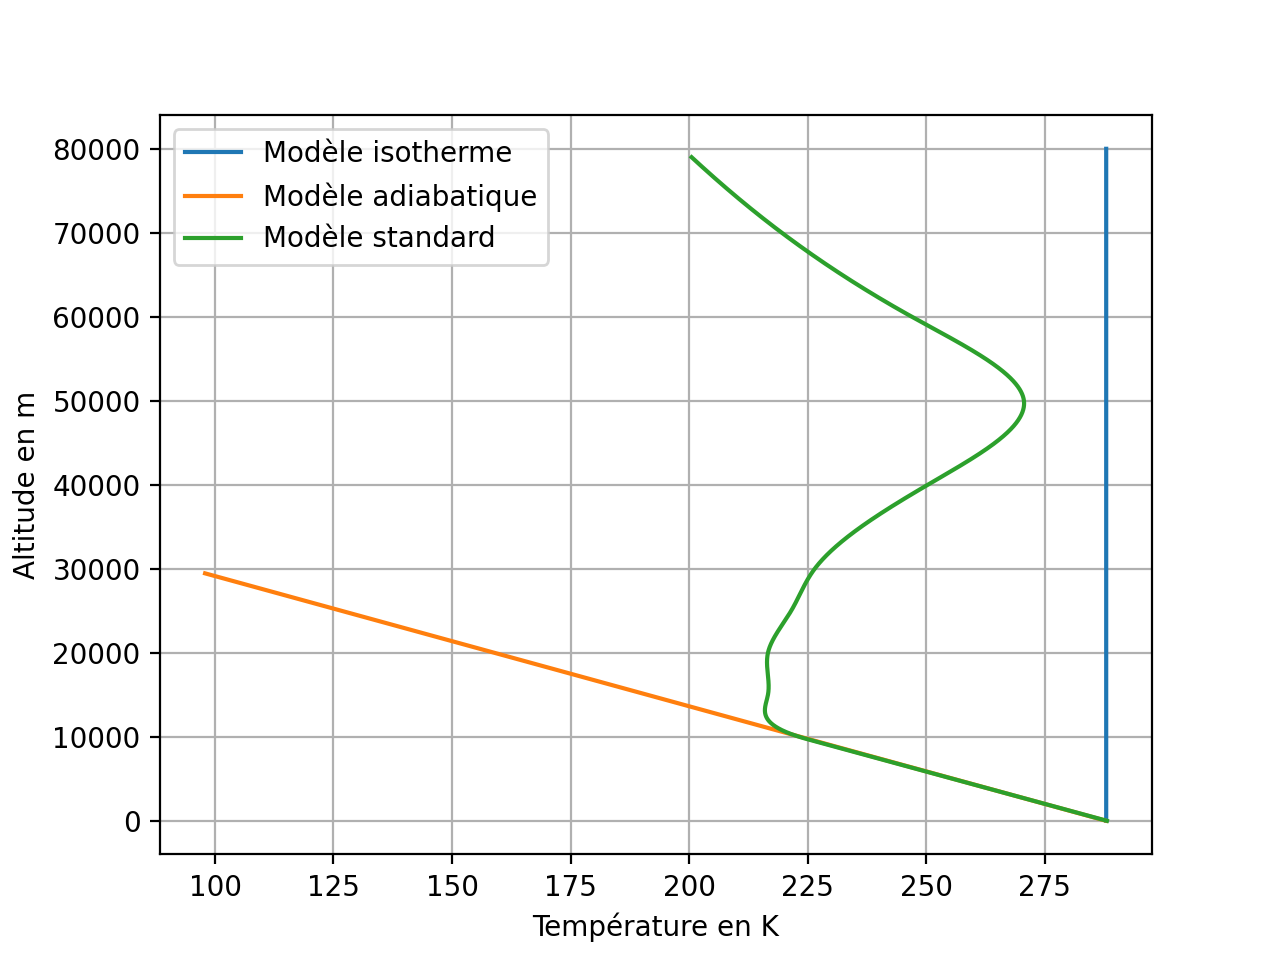

In [3]:
plt.figure("Courbes modèles de température atmosphérique")
plt.plot(T0*np.ones(100000), z_isoT, label="Modèle isotherme" )
plt.plot(T_adiab(z_adiab), z_adiab, label="Modèle adiabatique" )
plt.plot(T_standard(z_standard), z_standard, label="Modèle standard" )
plt.xlabel("Température en K")
plt.ylabel("Altitude en m")
plt.legend()
plt.grid(True)
plt.show()


## Méthode numérique
L'intégration numérique se fait à l'aide de la méthode `odeint` de la librairie `scipy` permet de résoudre les équations différentielles écrites sous la forme $\frac{\text{d}x}{\text{d}t}=f(x,t)$ de façon plus précise que la méthode d'Euler à discrétisation identique.

&nbsp;
Il faut donc créer une fonction `deriv_xxx`qui renvoie la valeur du second membre de l'équation différentielle et permet ensuite sa résolution.

In [4]:
def deriv_isoT(P , z):
    return -P*M*g/(R*T_isoT(z))

def deriv_adiab(P,z):
    return -P*M*g/(R*T_adiab(z))

def deriv_standard(P,z):
    return -P*M*g/(R*T_standard(z))


P_isoT = odeint(deriv_isoT,P0,z_isoT)


P_adiab = odeint(deriv_adiab,P0,z_adiab)


P_standard = odeint(deriv_standard,P0,z_standard)

Les résultats obtenus peuvent alors être tracés et comparés, lorsque celà est possible, à des résultats théoriques. Ces derniers sont masqués par défaut, mais peuvent être tracés en retirant la marque `#` de commentaire.

<IPython.core.display.Javascript object>


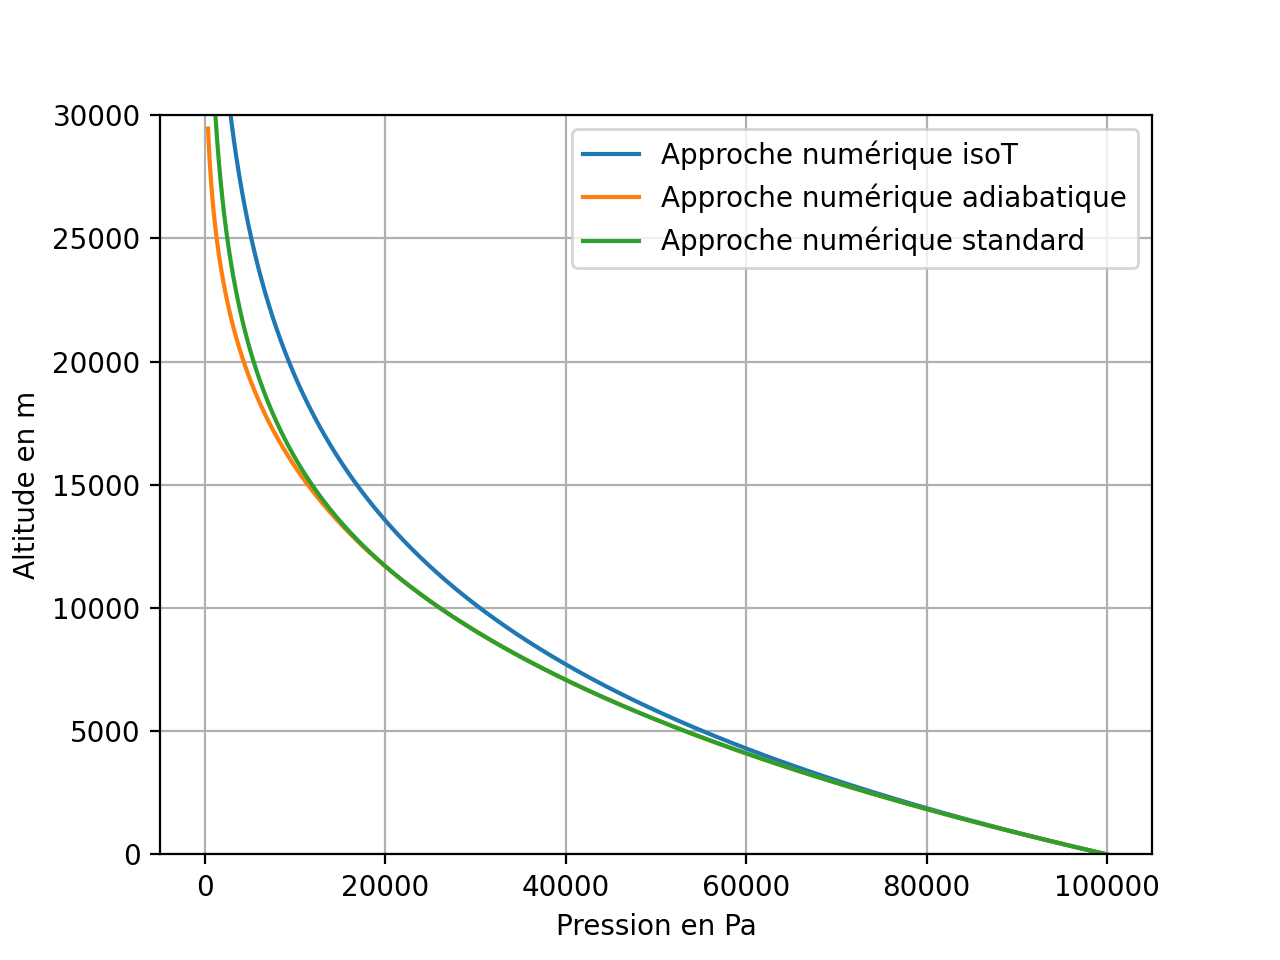

In [5]:
plt.figure("Courbes de pression calculées")
plt.plot(P_isoT,z_isoT, label="Approche numérique isoT")
#plt.plot(P_theo_isoT(z_isoT), z_isoT, label="Approche théorique isoT")

plt.plot(P_adiab,z_adiab, label="Approche numérique adiabatique")
#plt.plot(P_theo_adiab(z_adiab), z_adiab, label="Approche théorique adiabatique")

plt.plot(P_standard,z_standard, label="Approche numérique standard")
plt.legend()
plt.xlabel("Pression en Pa")
plt.ylabel("Altitude en m")
plt.ylim(0,30000)
plt.grid(True)
plt.show()